<a href="https://colab.research.google.com/github/slowe8/MAT421/blob/main/ModuleBPart1Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 421 Module B Homework 17.1 17.2 17.3
Name: Sean Lowe<br>
ASURITE: slowe8<br>
ASU ID: 1221120472<br>

**17.1 Interpolation Problem Statement**

Interpolation involves fitting an estimate to a dataset and estimating values according to the fitting. There are several different methods that one could use to fit and interpolate dataset. Some examples are linear interpolation and cubic spline interpolation, which is what will be discussed here. Linear interpolation essentially involves drawing lines between each data point. Cubic spline interpolation is similar, however it involves drawing piecewise cubic functions between each datapoint, so it allows for a smooth function. Becuase of the different characteristics of the methods, in order to pick the best estimate for a dataset, there needs to be some information about the data avaliable, so that the estimate can still inform the user of its accuracy. Notice how interpolation is not regression, since there is no modeling of the data. For example, you would not extrapolate data using an interpolation method.
<br><br>
For the following examples, lets define a general set of data points, with *x* being the independent variable and *y* being the dependent variable.


In [2]:
x = [0, 1, 3, 5, 9, 11, 15, 20, 30]
y = [5, 2, 4, 5, 10, 15, 7, 3, 10]

**17.2 Linear Interpolation**<br>
We can use linear interpolation to estimate any value within the range of the dataset. We can also use it to visualize the data.

Linear interpolation of 7:  7.5


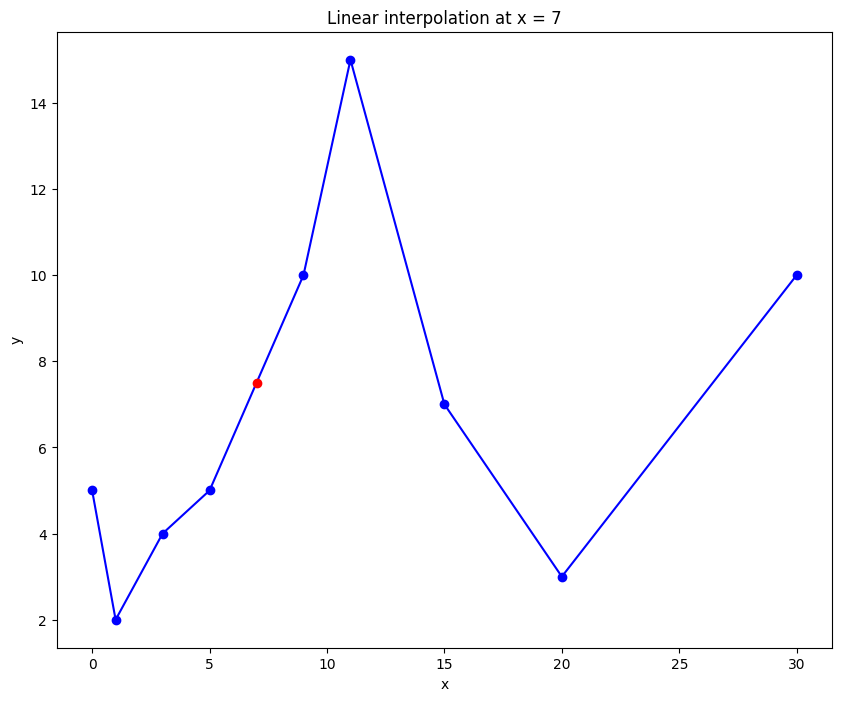

In [8]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# This returns a piecewise linear function for our dataset
linear_interp = interp1d(x, y)

linear_estimate = linear_interp(7)
print('Linear interpolation of 7: ', linear_estimate)

plt.figure(figsize=(10,8))
plt.plot(x,y,'-ob')
plt.plot(7, linear_estimate, 'ro')
plt.title('Linear interpolation at x = 7')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


**17.2 Cubic Spline Interpolation**<br>
If we want to make our estimate smooth, then we can perform a cubic spline interpolation instead.

Cubic spline interpolation of 7:  6.2098136939817605


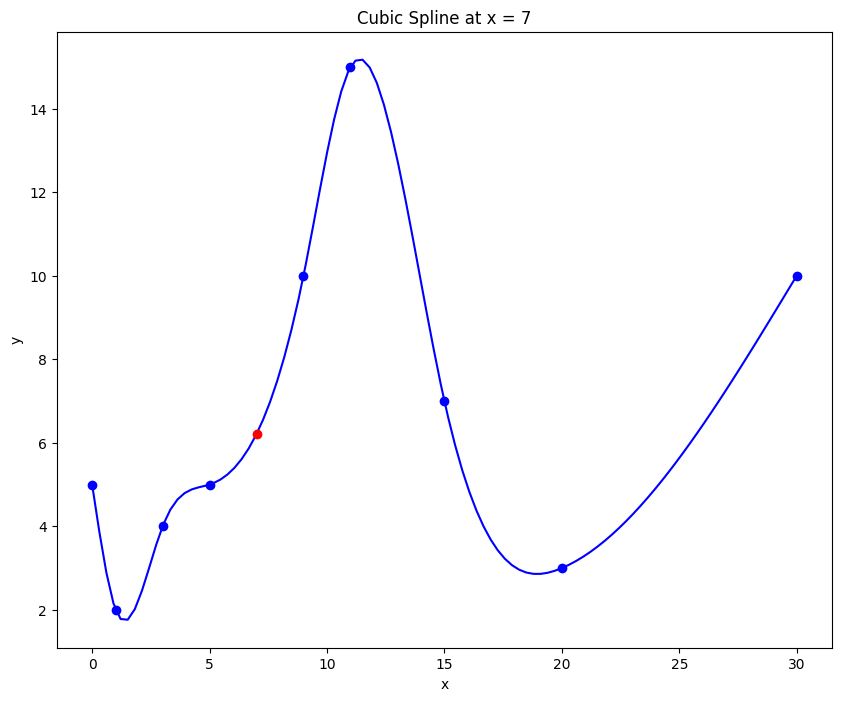

In [10]:
from scipy.interpolate import CubicSpline
import numpy as np

cubic_inter = CubicSpline(x, y, bc_type='natural')
cubic_estimate = cubic_inter(7)
print('Cubic spline interpolation of 7: ', cubic_estimate)

x_cont = np.linspace(0, max(x), 100)
y_cont = cubic_inter(x_cont)
plt.figure(figsize=(10,8))
plt.plot(x_cont,y_cont,'b')
plt.plot(x,y,'bo')
plt.plot(7, cubic_estimate, 'ro')
plt.title('Cubic Spline at x = 7')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Looking at the different interpolation methods above, we can see how they follow the same general shape, however the cubic spline interpolation offers a smooth estimation of the data. We can calculate the difference between the estimates to see how close the different interpolations are.

In [13]:
difference = abs(linear_estimate - cubic_estimate)
print('Difference between Linear and Cubic Spline interpolation: ', round(difference, ndigits=2))

perc_diff = (difference / ((linear_estimate + cubic_estimate)/2)) * 100
print('Percent difference between Linear and Cubic Spline interpolation: ', round(perc_diff, ndigits=2), '%')

Difference between Linear and Cubic Spline interpolation:  1.29
Percent difference between Linear and Cubic Spline interpolation:  18.82 %
